<table style="width:100%; border-collapse: collapse;">
  <tr>
    <td style="width:20%; vertical-align:middle;">
      <img src="LogoUVG.png" width="400"/>
    </td>
    <td style="text-align:left; vertical-align:middle;">
      <h2 style="margin-bottom: 0;">Universidad del Valle de Guatemala - UVG</h2>
      <h3 style="margin-top: 0;">Facultad de Ingeniería - Computación</h3>
      <p style="font-size: 16px; margin-bottom: 0; margin-top: -20px">
        <strong>Curso:</strong> Visión por Computadora 
        <strong>Sección:</strong> 10
      </p>
      <p style="font-size: 16px; margin: 0;"><strong>Proyecto 4:</strong> Redes Neuronales Convolucionales</p>
      <br>
      <p style="font-size: 15px; margin: 0;"><strong>Autores:</strong></p>
      <ul style="margin-top: 5px; padding-left: 20px; font-size: 15px;">
        <li>Diego Alexander Hernández Silvestre - <strong>21270</strong></li>
        <li>Linda Inés Jiménez Vides - <strong>21169</strong></li>
        <li>José Andrés Auyón Cobar - <strong>201579</strong></li>
      </ul>
    </td>
  </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import keyboard


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2]:
excel = r'data\PoultryMultilLabel.xlsx'
ruta =  r'data'

In [3]:
df = pd.read_excel(excel)
df

,filename,weight,age,sex
0,1G1.jpg,2.314851,24,Hembra
1,2G1.jpg,2.094389,24,Hembra
2,3G1.jpg,1.873927,24,Hembra
3,4G1.jpg,2.204620,24,Hembra
4,5G1.jpg,2.204620,24,Hembra
...,...,...,...,...
295,96G3.jpg,4.519471,38,Macho
296,97G3.jpg,4.629702,38,Macho
297,98G3.jpg,4.519471,38,Macho
298,99G3.jpg,4.629702,38,Macho


In [4]:
# 📸 Cargar imágenes y crear X, y
img_size = 224

X = []
y = []

for _, row in df.iterrows():
    img_path = os.path.join(ruta, row['filename'])
    img = cv2.imread(img_path)
    if img is not None:
        img = cv2.resize(img, (img_size, img_size))
        img = img / 255.0  # normalizar
        X.append(img)
        y.append(row['weight'])

X = np.array(X)
y = np.array(y)

In [5]:
# 🛑 Callback para detener el entrenamiento si la validación deja de mejorar
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=8,             # Espera 8 épocas sin mejora
    restore_best_weights=True,  # Restaura los mejores pesos
    verbose=1               
)

# 🧪 Separar train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1)  
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='mean_squared_error',
    metrics=['mae']
)

model.summary()

c:\Users\lijv1.LINDA_HP\Documents\GitHub\Proyecto4_VC\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# 🚀 Entrenamiento
history = model.fit(X_train, y_train, epochs=40, batch_size=32,
                    validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - loss: 5.0680 - mae: 1.8854 - val_loss: 2.8362 - val_mae: 1.1960
Epoch 2/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - loss: 2.5494 - mae: 1.2664 - val_loss: 1.8202 - val_mae: 1.2464
Epoch 3/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - loss: 2.1044 - mae: 1.1944 - val_loss: 1.8298 - val_mae: 1.1141
Epoch 4/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - loss: 2.0674 - mae: 1.1595 - val_loss: 1.6110 - val_mae: 1.1312
Epoch 5/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 461ms/step - loss: 1.9701 - mae: 1.1167 - val_loss: 1.4941 - val_mae: 1.0869
Epoch 6/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 468ms/step - loss: 1.8298 - mae: 1.1386 - val_loss: 1.5707 - val_mae: 0.9822
Epoch 7/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 476ms/step - loss: 1.7111 - mae: 1.0632 - val_loss: 1.9861 - val_mae: 1.0113
Epoch 8/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - loss: 1.7688 - mae: 0.9523 - val_loss: 1.2435 - val_mae: 1.0328
Epoch 9/40
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 469ms/step - loss: 1.6103 - mae: 

In [8]:
# 💾 Guardar modelo
model.save("modelo_pesaje_pollos.h5")

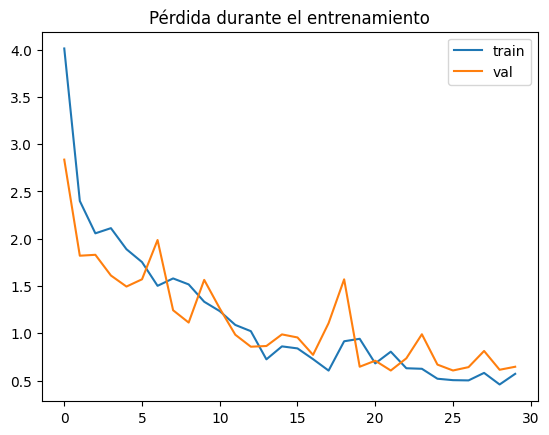

In [9]:
# 📈 Graficar curva de pérdida
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

In [6]:
# 🧠 Cargar modelo
model = load_model("modelo_pesaje_pollos.h5")

In [22]:
y_pred = model.predict(X_test).flatten()

# 2. Comparar con los valores reales

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} lbs")
print(f"RMSE: {rmse:.2f} lbs")
print(f"R²: {r2:.3f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
MAE: 0.59 lbs
RMSE: 0.78 lbs
R²: 0.643


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


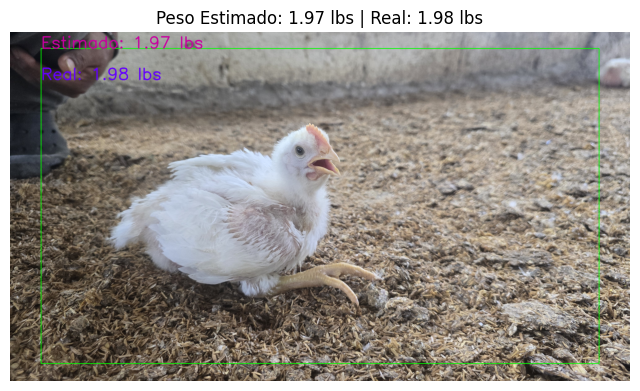

Estimado: 1.97 lbs | Real: 1.98 lbs


In [13]:
# 🐔 Función para predecir y visualizar
def predecir_y_mostrar(ruta_imagen):
    filename = os.path.basename(ruta_imagen)
    
    
    row = df[df['filename'] == filename]
    if row.empty:
        raise ValueError(f"No se encontró '{filename}' en el Excel.")
    peso_real = row.iloc[0]['weight']
    
    img_bgr = cv2.imread(ruta_imagen)
    if img_bgr is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {ruta_imagen}")
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_input = cv2.resize(img_bgr, (224, 224)) / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    peso_estimado = model.predict(img_input)[0][0]
    
    h, w, _ = img_rgb.shape
    start = (int(w * 0.05), int(h * 0.05))
    end = (int(w * 0.95), int(h * 0.95))
    img_rgb = cv2.rectangle(img_rgb, start, end, (0, 255, 0), 3)
    
    
    texto1 = f"Estimado: {peso_estimado:.2f} lbs"
    texto2 = f"Real: {peso_real:.2f} lbs"
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 3.5
    thickness = 7 
    color_est = (200, 0, 160)   
    color_real = (100, 0, 255)  
    y_texto1 = start[1] - 2
    y_texto2 = start[1] + 200

    img_rgb = cv2.putText(img_rgb, texto1, (start[0], y_texto1),
                        font, font_scale, color_est, thickness)
    img_rgb = cv2.putText(img_rgb, texto2, (start[0], y_texto2),
                        font, font_scale, color_real, thickness)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Peso Estimado: {peso_estimado:.2f} lbs | Real: {peso_real:.2f} lbs")
    plt.show()
    
    return peso_estimado, peso_real


while True:
    name = input("Ingresa el nombre de la fotografía: ")
    if keyboard.is_pressed('esc'):
        print("🚪 Saliendo...")
        break
    filename = name if name.endswith(".jpg") else name + ".jpg"
    
    if filename in df['filename'].values:
        break 
    else:
        print(f"❌ El nombre '{name}' no se encuentra en la lista. Intenta de nuevo.")

ruta = f"data/{filename}"
estimado, real = predecir_y_mostrar(ruta)
print(f"Estimado: {estimado:.2f} lbs | Real: {real:.2f} lbs")